In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers


In [ ]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def visualize_all(history, epochs_to_display):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    for epoch in epochs_to_display:
        axs[0].plot(epoch, acc[epoch - 1], 'ro')  # Menampilkan titik merah untuk training accuracy pada epoch tertentu
        axs[0].plot(epoch, val_acc[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation accuracy pada epoch tertentu

        axs[1].plot(epoch, loss[epoch - 1], 'ro')  # Menampilkan titik merah untuk training loss pada epoch tertentu
        axs[1].plot(epoch, val_loss[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation loss pada epoch tertentu

    axs[0].plot(epochs, acc, 'r-', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b-', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r-', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b-', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
epochs_to_display = [10, 20, 30, 40, 50]  # Misalnya, ingin menampilkan visualisasi untuk epoch 10, 20, 30, 40, dan 50


In [ ]:
from PIL import Image
import os
import random

def display_image_properties(image_path):
    try:
        with Image.open(image_path) as img:
            print(f"Filename: {os.path.basename(image_path)}")
            print(f"Format: {img.format}")
            print(f"Mode: {img.mode}")
            print(f"Size: {img.size}")
            print(f"Info: {img.info}")
            img.show()

    except Exception as e:
        print(f"Error: {e}")

def sample_and_display_properties(dataset_dir, sample_size=5):
    # mengambil semua images dalam dataset
    all_images = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp')):
                all_images.append(os.path.join(root, file))

    # melakukan cek apakah images ada pada variabel all_images
    if len(all_images) < sample_size:
        print(f"Only {len(all_images)} images found in the dataset.")
        sample_size = len(all_images)

    # mengambil sampel random dari dataset
    sampled_images = random.sample(all_images, sample_size)

    # menampilkan properties dari sampel
    for image_path in sampled_images:
        display_image_properties(image_path)
        print("-" * 30)  # Separator between images

# Example usage:
dataset_dir = "/content/drive/MyDrive/PUI/train"
sample_and_display_properties(dataset_dir, sample_size=5)


Filename: 17946.jpg
Format: JPEG
Mode: RGB
Size: (512, 512)
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
------------------------------
Filename: 4621.jpg
Format: JPEG
Mode: RGB
Size: (512, 512)
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
------------------------------
Filename: 7087.jpg
Format: JPEG
Mode: RGB
Size: (512, 512)
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
------------------------------
Filename: 7130.jpg
Format: JPEG
Mode: RGB
Size: (512, 512)
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
------------------------------
Filename: 15508.jpg
Format: JPEG
Mode: RGB
Size: (512, 512)
Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
------------------------------


In [ ]:

 # use this function for preparing data
training_dir="/content/drive/MyDrive/PUI/train"
validation_dir="/content/drive/MyDrive/PUI/validation"
test_dir="/content/drive/MyDrive/PUI/Test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode="binary")


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode="binary")

    return train_set , validation_set

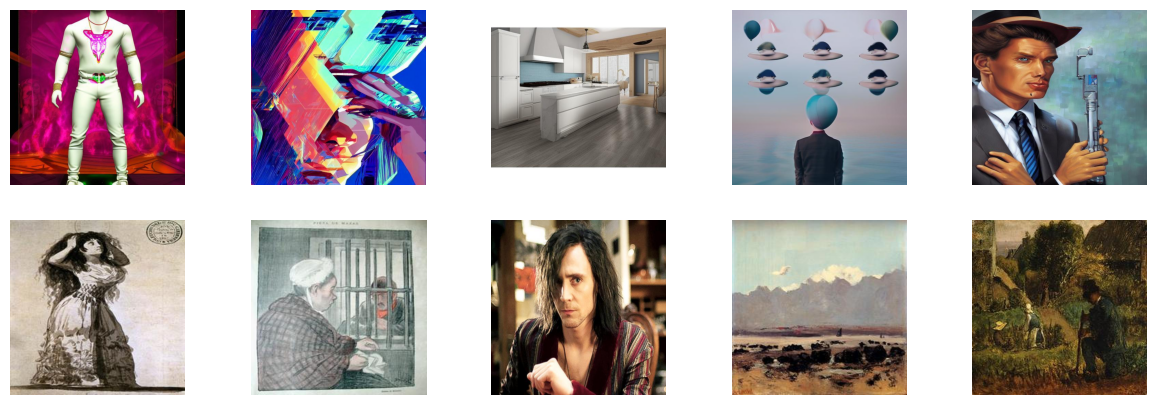

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

class_1_folder = '/content/drive/MyDrive/PUI/train/generate_ai'
class_2_folder = '/content/drive/MyDrive/PUI/train/non_ai'
# List file gambar dalam setiap folder
class_1_images = os.listdir(class_1_folder)
class_2_images = os.listdir(class_2_folder)

# Pilih beberapa gambar secara acak dari setiap kelas
num_samples = 5
sampled_class_1_images = random.sample(class_1_images, num_samples)
sampled_class_2_images = random.sample(class_2_images, num_samples)

# Gabungkan gambar dari kedua kelas
combined_images = sampled_class_1_images + sampled_class_2_images

# Tentukan path lengkap untuk setiap gambar
combined_image_paths = [os.path.join(class_1_folder, img) for img in sampled_class_1_images] + \
                       [os.path.join(class_2_folder, img) for img in sampled_class_2_images]

# Visualisasikan gambar
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(combined_image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

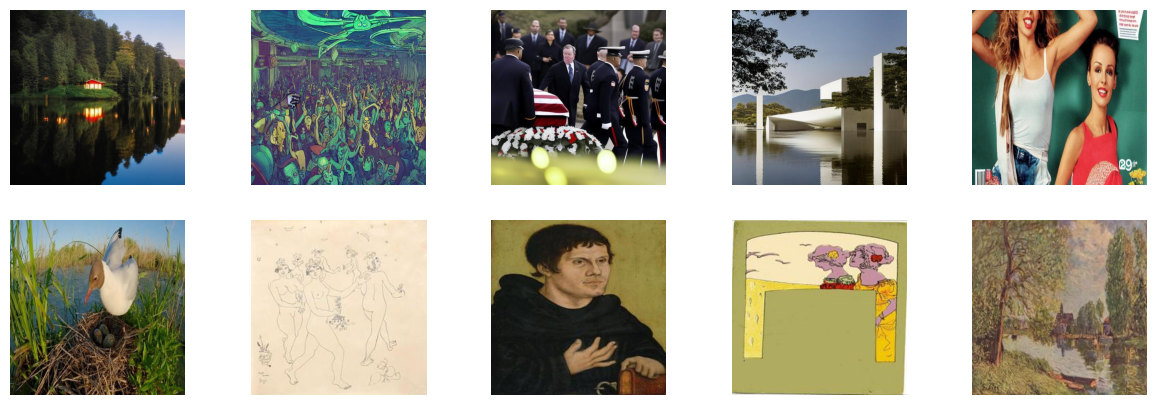

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

class_1_folder = '/content/drive/MyDrive/PUI/validation/generate_ai'
class_2_folder = '/content/drive/MyDrive/PUI/validation/non_ai'
# List file gambar dalam setiap folder
class_1_images = os.listdir(class_1_folder)
class_2_images = os.listdir(class_2_folder)

# Pilih beberapa gambar secara acak dari setiap kelas
num_samples = 5
sampled_class_1_images = random.sample(class_1_images, num_samples)
sampled_class_2_images = random.sample(class_2_images, num_samples)

# Gabungkan gambar dari kedua kelas
combined_images = sampled_class_1_images + sampled_class_2_images

# Tentukan path lengkap untuk setiap gambar
combined_image_paths = [os.path.join(class_1_folder, img) for img in sampled_class_1_images] + \
                       [os.path.join(class_2_folder, img) for img in sampled_class_2_images]

# Visualisasikan gambar
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(combined_image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

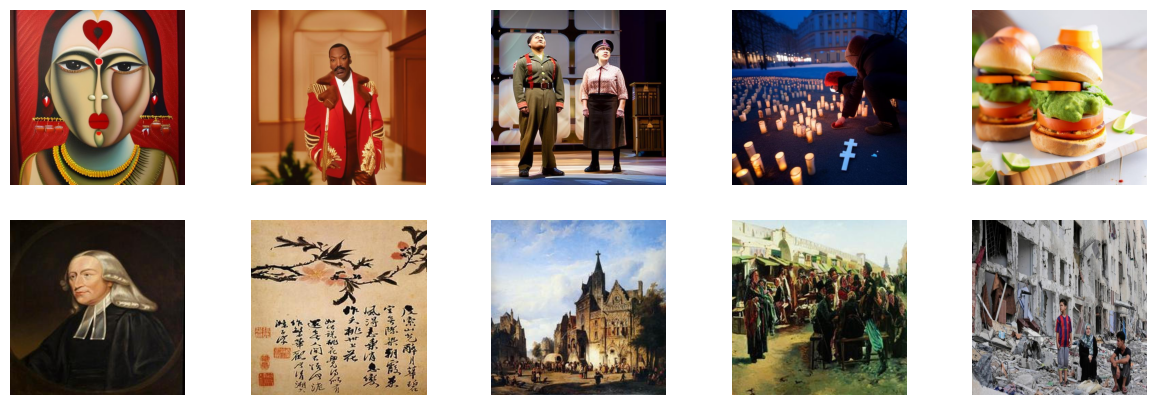

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

class_1_folder = '/content/drive/MyDrive/PUI/Test/ai'
class_2_folder = '/content/drive/MyDrive/PUI/Test/non ai'
# List file gambar dalam setiap folder
class_1_images = os.listdir(class_1_folder)
class_2_images = os.listdir(class_2_folder)

# Pilih beberapa gambar secara acak dari setiap kelas
num_samples = 5
sampled_class_1_images = random.sample(class_1_images, num_samples)
sampled_class_2_images = random.sample(class_2_images, num_samples)

# Gabungkan gambar dari kedua kelas
combined_images = sampled_class_1_images + sampled_class_2_images

# Tentukan path lengkap untuk setiap gambar
combined_image_paths = [os.path.join(class_1_folder, img) for img in sampled_class_1_images] + \
                       [os.path.join(class_2_folder, img) for img in sampled_class_2_images]

# Visualisasikan gambar
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(combined_image_paths):
    img = mpimg.imread(img_path)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
# augmented train dataset
augmented_train_set,validation_set=prep_data(True)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
# not augmented train set
straight_train_set,validation_set=prep_data(False)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
import os
import matplotlib.pyplot as plt

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(training_dir):
    class_path = os.path.join(training_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

test_class_counts = {}
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        test_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

print("test set Distribution:")
print(test_class_counts)


Training set Distribution:
{'generate_ai': 2785, 'non_ai': 2500}
Validation set Distribution:
{'generate_ai': 505, 'non_ai': 505}
test set Distribution:
{'ai': 50, 'non ai': 50}


In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 21.5 MB/s eta 0:00:00


# **Bangun Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Membuat objek model Sequential
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.01))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.01))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,834,977 (10.81 MB)

 Trainable params: 2,834,977 (10.81 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


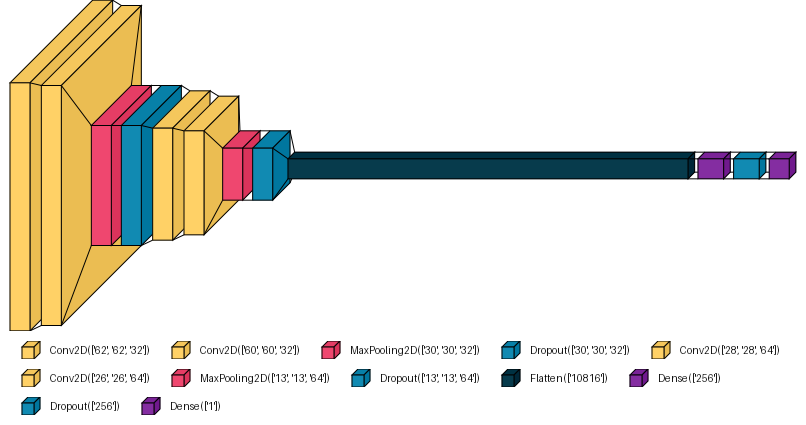

In [ ]:
import visualkeras

model = model

# visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, legend=True, show_dimension=True, to_file='output.png') # write to disk
# visualkeras.layered_view(model, to_file='output.png').show() # write and show

In [ ]:
train_set,validation_set=prep_data(True, batch_size=32)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
# latih
latih1 = model.fit(train_set, epochs=50, validation_data=validation_set, )


Epoch 1/50
166/166 [==============================] - 268s 2s/step - loss: 0.6184 - accuracy: 0.6670 - val_loss: 0.6665 - val_accuracy: 0.6426
Epoch 2/50
166/166 [==============================] - 38s 230ms/step - loss: 0.5721 - accuracy: 0.7065 - val_loss: 0.6342 - val_accuracy: 0.6752
Epoch 3/50
166/166 [==============================] - 38s 228ms/step - loss: 0.5577 - accuracy: 0.7150 - val_loss: 0.6050 - val_accuracy: 0.6802
Epoch 4/50
166/166 [==============================] - 37s 226ms/step - loss: 0.5369 - accuracy: 0.7364 - val_loss: 0.5298 - val_accuracy: 0.7297
Epoch 5/50
166/166 [==============================] - 38s 229ms/step - loss: 0.5137 - accuracy: 0.7457 - val_loss: 0.5255 - val_accuracy: 0.7505
Epoch 6/50
166/166 [==============================] - 39s 234ms/step - loss: 0.5096 - accuracy: 0.7453 - val_loss: 0.5119 - val_accuracy: 0.7366
Epoch 7/50
166/166 [==============================] - 38s 229ms/step - loss: 0.5030 - accuracy: 0.7548 - val_loss: 0.5439 - val_accu

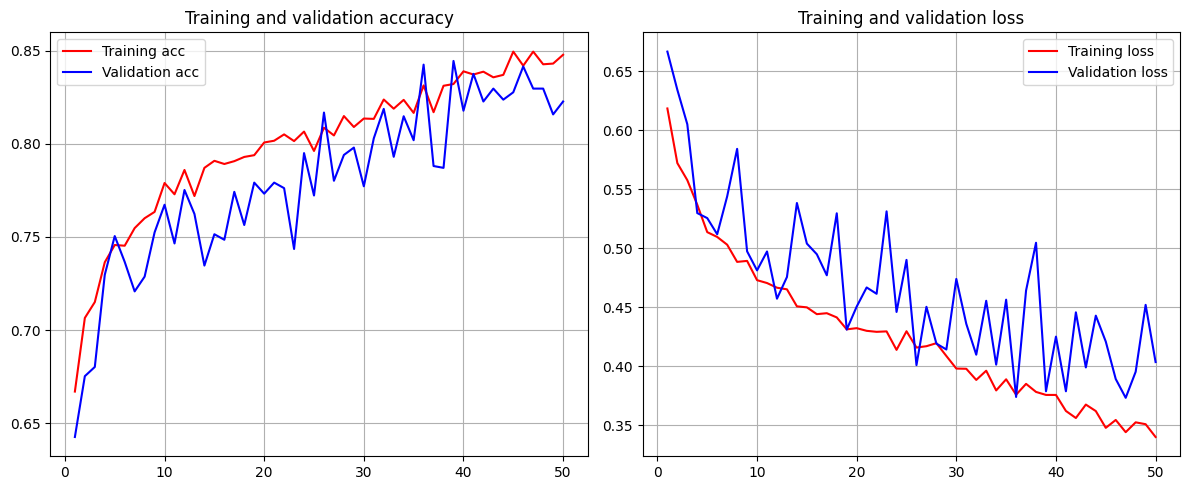

In [ ]:
visualize(latih1)

In [ ]:
from tensorflow.keras.models import save_model

# Simpan model ke file 'model_terlatih.h5'
save_model(model,'/content/drive/MyDrive/PUI/model_terlatih.keras')
save_model(model,'/content/drive/MyDrive/PUI/model_terlatih.h5')


<ipython-input-16-0dd6f37cfab5>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'/content/drive/MyDrive/PUI/model_terlatih.h5')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Membuat objek model Sequential
model = Sequential()

# Menambahkan layer Convolutional pertama
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

# Menambahkan layer Convolutional kedua
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Convolutional ketiga
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Convolutional keempat
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Flatten
model.add(Flatten())

# Menambahkan layer Dense dengan 256 unit neuron dan fungsi aktivasi ReLU
model.add(Dense(units=256, activation='relu'))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Dense output dengan 1 unit neuron (untuk klasifikasi biner) dan fungsi aktivasi sigmoid
model.add(Dense(units=1, activation='sigmoid'))

# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

In [ ]:
train_set,validation_set=prep_data(False, batch_size=32)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
latih2 = model.fit(train_set, epochs=30, validation_data=validation_set)

Epoch 1/30
166/166 [==============================] - 755s 4s/step - loss: 0.4635 - accuracy: 0.7629 - val_loss: 0.3316 - val_accuracy: 0.8515
Epoch 2/30
166/166 [==============================] - 28s 171ms/step - loss: 0.3379 - accuracy: 0.8454 - val_loss: 0.3030 - val_accuracy: 0.8673
Epoch 3/30
166/166 [==============================] - 28s 171ms/step - loss: 0.2983 - accuracy: 0.8706 - val_loss: 0.2873 - val_accuracy: 0.8822
Epoch 4/30
166/166 [==============================] - 29s 173ms/step - loss: 0.2487 - accuracy: 0.8910 - val_loss: 0.2956 - val_accuracy: 0.8723
Epoch 5/30
166/166 [==============================] - 29s 176ms/step - loss: 0.2140 - accuracy: 0.9044 - val_loss: 0.2904 - val_accuracy: 0.8822
Epoch 6/30
166/166 [==============================] - 29s 173ms/step - loss: 0.1729 - accuracy: 0.9296 - val_loss: 0.3389 - val_accuracy: 0.8574
Epoch 7/30
166/166 [==============================] - 28s 172ms/step - loss: 0.1362 - accuracy: 0.9463 - val_loss: 0.2930 - val_accu

In [ ]:
from tensorflow.keras.models import save_model

# Simpan model ke file 'model_terlatih.h5'
save_model(model,'/content/drive/MyDrive/PUI/model_terlatih2.keras')
save_model(model,'/content/drive/MyDrive/PUI/model_terlatih2.h5')

<ipython-input-11-bd6addd6e5b1>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'/content/drive/MyDrive/PUI/model_terlatih2.h5')


In [ ]:
# Path ke dataset uji
test_data_dir = '/content/drive/MyDrive/PUI/test_data'

# Periksa apakah direktori uji ada dan tidak kosong
if not os.path.exists(test_data_dir) or not os.listdir(test_data_dir):
    raise ValueError("Direktori uji tidak ada atau kosong")

In [ ]:
from tensorflow.keras.models import load_model

# Load model yang telah dilatih
model = load_model('/content/drive/MyDrive/PUI/model_terlatih.h5')
test_dir = '/content/drive/MyDrive/PUI/test_data'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_generator)

# Jika Anda ingin mendapatkan label prediksi (misalnya untuk binary classification)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan beberapa hasil prediksi
for i in range(len(predictions)):
    print(f'Image: {test_generator.filenames[i]}, True Label: {test_generator.classes[i]}, Predicted: {predicted_labels[i][0]}')

# Buat DataFrame untuk menyimpan hasil
results_df = pd.DataFrame({
    'Filename': test_generator.filenames,
    'TrueLabel': test_generator.classes,
    'PredictedLabel': predicted_labels.flatten()
})

# Simpan hasil ke file CSV
results_df.to_csv('prediction_results.csv', index=False)


Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

Found 100 images belonging to 2 classes.
4/4 [==============================] - 2s 307ms/step


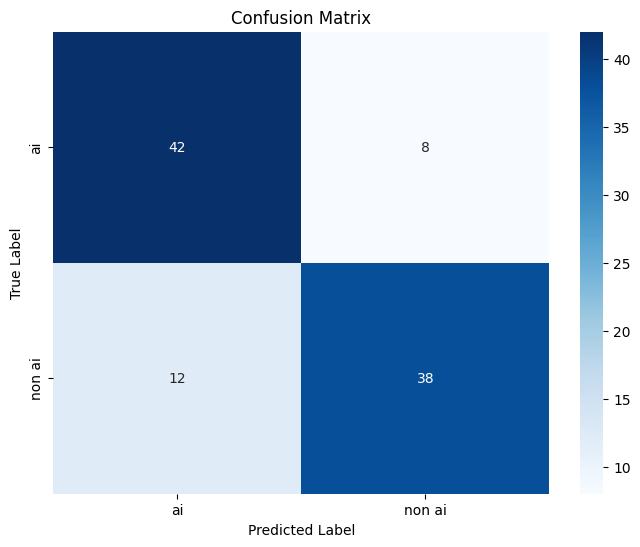

              precision    recall  f1-score   support

          ai       0.78      0.84      0.81        50
      non ai       0.83      0.76      0.79        50

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Path ke model yang telah disimpan
model_path = '/content/drive/MyDrive/PUI/model_terlatih.h5'

# Path ke folder test data
test_data_dir = '/content/drive/MyDrive/PUI/Test'

# Memuat model yang telah disimpan
model = load_model(model_path)

# Membuat ImageDataGenerator untuk data testing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Membuat generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),  # Sesuaikan dengan ukuran input model Anda
    batch_size=32,
    class_mode='binary',  # Sesuaikan dengan jenis klasifikasi Anda
    shuffle=False  # Tidak perlu di-shuffle karena kita ingin membandingkan dengan label asli
)

# Mendapatkan label asli dari data testing
test_labels = test_generator.classes

# Melakukan prediksi terhadap data testing
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print(classification_report(test_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

results_df = pd.DataFrame({
    'Filename': test_generator.filenames,
    'TrueLabel': test_generator.classes,
    'PredictedLabel': predicted_labels.flatten()
})

# Simpan hasil ke file CSV
results_df.to_csv('prediction_results.csv', index=False)

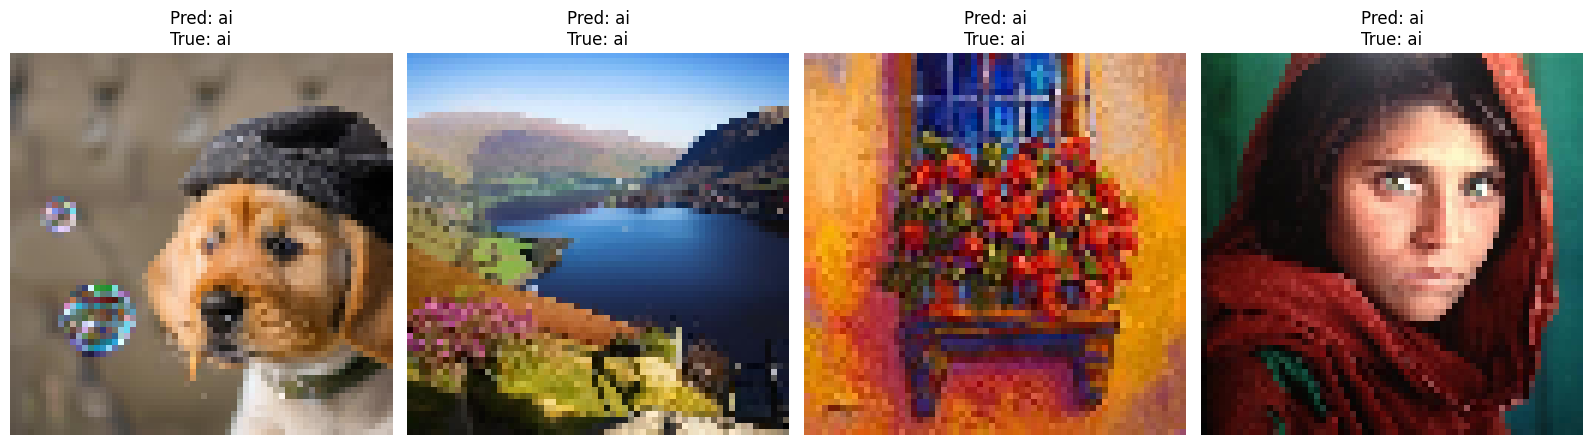

In [ ]:
def plot_sample_images(generator, predictions, true_labels, class_indices, num_samples=4):
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        # Memuat gambar dari generator
        img, label = generator.next()
        img = img[0]
        true_label = true_labels[i]
        predicted_label = predictions[i]
        class_labels = list(class_indices.keys())

        # Menampilkan gambar dengan prediksi dan label asli
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f'Pred: {class_labels[predicted_label]}\nTrue: {class_labels[true_label]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Tampilkan 10 sampel gambar dengan prediksi dan label asli
plot_sample_images(test_generator, predicted_labels, test_labels, test_generator.class_indices, num_samples=4)

Found 5285 images belonging to 2 classes.
166/166 [==============================] - 692s 4s/step


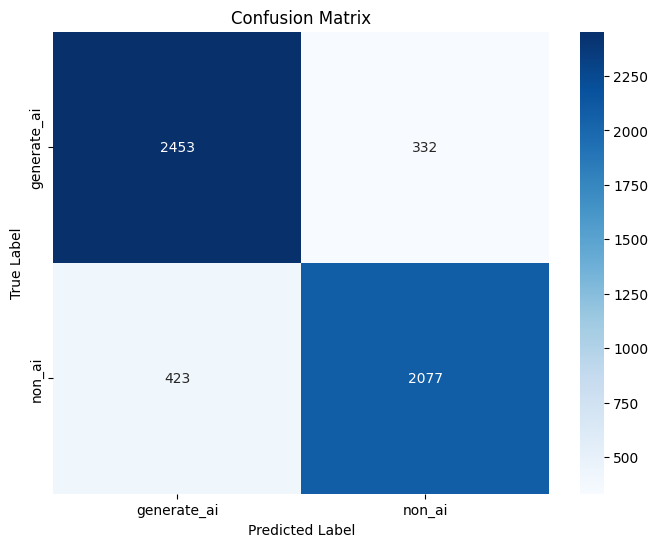

              precision    recall  f1-score   support

 generate_ai       0.85      0.88      0.87      2785
      non_ai       0.86      0.83      0.85      2500

    accuracy                           0.86      5285
   macro avg       0.86      0.86      0.86      5285
weighted avg       0.86      0.86      0.86      5285



In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Path ke model yang telah disimpan
model_path = '/content/drive/MyDrive/PUI/model_terlatih.h5'

# Path ke folder test data
test_data_dir = '/content/drive/MyDrive/PUI/train'

# Memuat model yang telah disimpan
model = load_model(model_path)

# Membuat ImageDataGenerator untuk data testing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Membuat generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),  # Sesuaikan dengan ukuran input model Anda
    batch_size=32,
    class_mode='binary',  # Sesuaikan dengan jenis klasifikasi Anda
    shuffle=False  # Tidak perlu di-shuffle karena kita ingin membandingkan dengan label asli
)

# Mendapatkan label asli dari data testing
test_labels = test_generator.classes

# Melakukan prediksi terhadap data testing
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print(classification_report(test_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

results_df = pd.DataFrame({
    'Filename': test_generator.filenames,
    'TrueLabel': test_generator.classes,
    'PredictedLabel': predicted_labels.flatten()
})

# Simpan hasil ke file CSV
results_df.to_csv('prediction_results_train.csv', index=False)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

# 1. Load dan preprocess gambar
image = Image.open("/content/drive/MyDrive/PUI/train/generate_ai/1.jpg").convert("RGB")
image = image.resize((64, 64))
image_array = np.array(image).astype("float32") / 255.0  # Normalisasi ke [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Tambah dimensi batch: (1, 64, 64, 3)

# 2. Bangun model CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.01))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.01))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(units=1, activation='sigmoid'))

# 3. Compile dan panggil model
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# model(image_array)  # Penting agar model.input tersedia

_ = model.predict(image_array)

# 4. Ambil output dari layer pertama Conv2D
intermediate_model = Model(inputs=model.input, outputs=model.layers[0].output)
model_output = intermediate_model.predict(image_array)

# 5. Ambil bobot dan bias dari filter ke-0 di layer pertama
weights, biases = model.layers[0].get_weights()  # weights: (3, 3, 3, 32)
filter0 = weights[:, :, :, 0]  # Ambil filter ke-0 (3x3x3)
bias0 = biases[0]

# 6. Ambil patch input pada posisi kiri atas (0:3, 0:3)
patch = image_array[0, 0:3, 0:3, :]  # shape: (3, 3, 3)

# 7. Hitung hasil konvolusi manual
conv_result = np.sum(patch * filter0) + bias0
relu_result = max(0, conv_result)  # ReLU activation

# 8. Ambil hasil model dari posisi [0, 0, 0, 0] (batch, y, x, channel)
model_result = model_output[0, 0, 0, 0]

# 9. Tampilkan hasil dan selisihnya
print("Hasil perhitungan manual (ReLU):", relu_result)
print("Hasil model (output[0,0,0,0])   :", model_result)
print("Selisih (abs error)             :", abs(relu_result - model_result))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

# Set seed untuk semua sumber random
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 1. Load gambar
image = Image.open("/content/drive/MyDrive/PUI/train/generate_ai/1.jpg").convert("RGB")
image = image.resize((64, 64))
image_array = np.array(image).astype("float32") / 255.0
image_array = np.expand_dims(image_array, axis=0)

# 2. Model CNN (Functional API)
input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu', name="conv1")(input_layer)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.01)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.01)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.01)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 3. Intermediate model untuk output dari conv1
intermediate_model = Model(inputs=model.input, outputs=model.get_layer("conv1").output)
_ = model.predict(image_array)  # Trigger model build
model_output = intermediate_model.predict(image_array)

# 4. Ambil bobot filter pertama dari conv1
weights, biases = model.get_layer("conv1").get_weights()
filter0 = weights[:, :, :, 0]
bias0 = biases[0]

# 5. Bandingkan banyak patch
print("i,j | Manual       | Model        | Selisih")
print("----------------------------------------------")
for i in range(5):  # Ubah sesuai jumlah titik yang ingin dibandingkan
    for j in range(5):
        patch = image_array[0, i:i+3, j:j+3, :]
        conv_result = np.sum(patch * filter0) + bias0
        relu_result = max(0, conv_result)
        model_result = model_output[0, i, j, 0]
        diff = abs(relu_result - model_result)
        print(f"{i:>2},{j:<2}| {relu_result:.8f} | {model_result:.8f} | {diff:.8e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
i,j | Manual       | Model        | Selisih
----------------------------------------------
 0,0 | 0.02178051 | 0.02178051 | 5.58793545e-09
 0,1 | 0.02850569 | 0.02850568 | 5.58793545e-09
 0,2 | 0.03615443 | 0.03615444 | 7.45058060e-09
 0,3 | 0.03838859 | 0.03838858 | 7.45058060e-09
 0,4 | 0.04413984 | 0.04413984 | 7.45058060e-09
 1,0 | 0.02411307 | 0.02411306 | 1.11758709e-08
 1,1 | 0.03459116 | 0.03459116 | 7.45058060e-09
 1,2 | 0.03652404 | 0.03652404 | 3.72529030e-09
 1,3 | 0.03970385 | 0.03970385 | 3.72529030e-09
 1,4 | 0.04421051 | 0.04421050 | 3.72529030e-09
 2,0 | 0.02698585 | 0.02698585 | 3.72529030e-09
 2,1 | 0.03301358 | 0.03301357 | 3.72529030e-09
 2,2 | 0.03752486 | 0.03752487 | 7.45058060e-09
 2,3 | 0.03971530 | 0.03971530 | 0.00000000e+00
 2,4 | 0.04193074 | 0.04193075 | 7.45058060e-09
 3,0 | 0.02481178 | 0.02481178 | 3.72529030e-09
 3,1 | 0.03077731 | 0.03077731 | 0.00000000e+00
 3,2 | 0.0391539

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D
from PIL import Image
import random
import os

# 1. Load gambar dan preproses
image = Image.open("/content/drive/MyDrive/PUI/train/generate_ai/1.jpg").convert("RGB")
image = image.resize((64, 64))
image_array = np.array(image).astype("float32") / 255.0
image_array = np.expand_dims(image_array, axis=0)

# 2. Definisikan model (1 layer Conv2D saja untuk fokus uji konvolusi)
input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu', name='conv_1')(input_layer)
model = Model(inputs=input_layer, outputs=x)

# 3. Jalankan prediksi untuk menginisialisasi model
model.predict(image_array)

# 4. Ambil output layer pertama
intermediate_model = Model(inputs=model.input, outputs=model.get_layer("conv_1").output)
model_output = intermediate_model.predict(image_array)  # shape: (62, 62, 32)

# 5. Ambil bobot filter
weights, biases = model.get_layer("conv_1").get_weights()  # weights.shape: (3, 3, 3, 32)

# 6. Uji beberapa titik dan beberapa filter
test_coords = [(0, 0), (10, 10), (30, 30)]  # Titik berbeda di gambar
num_filters_to_test = 5  # Uji 5 filter pertama

for (i, j) in test_coords:
    print(f"\n📍 Titik patch: ({i}, {j})")
    patch = image_array[0, i:i+3, j:j+3, :]  # Ukuran patch 3x3x3

    for f in range(num_filters_to_test):
        filter_f = weights[:, :, :, f]
        bias_f = biases[f]

        # Manual convolution
        conv_result = np.sum(patch * filter_f) + bias_f
        relu_result = max(0, conv_result)

        # Output model
        model_result = model_output[0, i, j, f]

        print(f"Filter {f}: Manual={relu_result:.6f} | Model={model_result:.6f} | Selisih={abs(relu_result - model_result):.6f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

📍 Titik patch: (0, 0)
Filter 0: Manual=0.007138 | Model=0.007138 | Selisih=0.000000
Filter 1: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 2: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 3: Manual=0.074306 | Model=0.074306 | Selisih=0.000000
Filter 4: Manual=0.218648 | Model=0.218648 | Selisih=0.000000

📍 Titik patch: (10, 10)
Filter 0: Manual=0.016011 | Model=0.016011 | Selisih=0.000000
Filter 1: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 2: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 3: Manual=0.206072 | Model=0.206071 | Selisih=0.000000
Filter 4: Manual=0.515809 | Model=0.515809 | Selisih=0.000000

📍 Titik patch: (30, 30)
Filter 0: Manual=0.045761 | Model=0.045761 | Selisih=0.000000
Filter 1: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 2: Manual=0.000000 | Model=0.000000 | Selisih=0.000000
Filter 3: Manual=0.195805 | Model=0.195805 | 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.optimizers import Adam
from PIL import Image
import random
import os

# Set seed untuk semua sumber random
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


# Load dan preproses gambar
image = Image.open("/content/drive/MyDrive/PUI/train/generate_ai/1.jpg").convert("RGB")
image = image.resize((64, 64))
image_array = np.array(image).astype("float32") / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Bangun model CNN minimal
input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer=Adam(), loss='binary_crossentropy',b)

# Jalankan satu prediksi untuk inisialisasi bobot
_ = model.predict(image_array)

# Buat model intermediate untuk ambil output conv1
intermediate_model = Model(inputs=model.input, outputs=model.get_layer('conv1').output)
model_output = intermediate_model.predict(image_array)

# Ambil bobot dan bias filter ke-0
weights, biases = model.get_layer('conv1').get_weights()
filter0 = weights[:, :, :, 0]
bias0 = biases[0]

# Ambil patch di pojok kiri atas (0,0)
patch = image_array[0, 0:3, 0:3, :]

# Tampilkan patch input
print("\nPATCH INPUT (3x3x3):")
print(np.round(patch, 3))

# Tampilkan filter
print("\nFILTER 0 (3x3x3):")
print(np.round(filter0, 3))

# Elemen per elemen perkalian
product = patch * filter0
print("\nELEMENT-WISE MULTIPLICATION:")
print(np.round(product, 4))

# Jumlahkan semua nilai
sum_result = np.sum(product)
print(f"\nSUM OF PRODUCTS: {sum_result:.6f}")

# Tambahkan bias
sum_with_bias = sum_result + bias0
print(f"SUM + BIAS ({bias0:.6f}): {sum_with_bias:.6f}")

# Aplikasikan ReLU
relu_result = max(0, sum_with_bias)
print(f"ReLU OUTPUT (manual): {relu_result:.6f}")

# Bandingkan dengan output model
model_result = model_output[0, 0, 0, 0]
print(f"MODEL OUTPUT: {model_result:.6f}")

# Selisih
print(f"DIFFERENCE: {abs(relu_result - model_result):.8f}")


ValueError: Could not interpret initializer identifier: 0